### Data Exploration

In [10]:
#import packages
import os
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Data Import

**We import the NBA and NCAA datasets below**

*NBA Dataset*

In [ ]:
filepath = os.path.join(os.getcwd(),"..","Data","NBA","NBA_Shot_Locations_1997-2020.csv")
nba = pd.read_csv(filepath)

In [ ]:
nba.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


*NCAA Dataset*

In [2]:
filepath = os.path.join(os.getcwd(),"..","Data","NCAA")

ncaa = pd.DataFrame()

for filename in sorted(os.listdir(filepath)):
    
    if filename != ".DS_Store":
        temp = pd.read_csv(os.path.join(filepath, filename))
        ncaa = pd.concat([ncaa, temp])


In [27]:
#ncaa.to_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")

In [202]:
sample = pd.read_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")

/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_99464/3682453584.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")


In [12]:
shots = sample[['game_id','load_timestamp','season','away_name','away_id','away_alias','home_name','home_id','home_alias',
               'period','game_clock','elapsed_time_sec','team_name','team_id','team_alias','team_basket','possession_team_id',
               'player_id','player_full_name','event_id','timestamp','event_coord_x','event_coord_y','event_type','type','shot_made',
               'shot_type','shot_subtype','three_point_shot','points_scored','timeout_duration']]

### Boxscore Data Import

Data accessed via sql commands to Google Cloud BigQuery database uploaded by SportsRadar and NCAA.

In [170]:
boxscore = pd.read_csv("/Users/chejeong/Desktop/ncaa_boxscore.csv")

/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_99464/3227788668.py:1: DtypeWarning: Columns (4,7,8,9,10,11,16,21,58) have mixed types. Specify dtype option on import or set low_memory=False.
  boxscore = pd.read_csv("/Users/chejeong/Desktop/ncaa_boxscore.csv")


In [171]:
box = boxscore[['game_id', 'season', 'home_team', 'team_id', 'name', 'alias', 'opp_id', 'opp_name', 'win', 'points_game',
                'field_goals_made', 'field_goals_att', 'field_goals_pct', 'three_points_made', 'three_points_att',
                'three_points_pct', 'two_points_made', 'two_points_att', 'two_points_pct', 'free_throws_made',
                'free_throws_att','free_throws_pct', 'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
                'turnovers', 'steals', 'blocks', 'personal_fouls', 'foulouts', 'points', 'fast_break_pts', 'second_chance_pts',
                'points_off_turnovers']]

In [24]:
#filter to only home_team to avoid duplicate rows
box = box.loc[box['home_team']==True]

#box.to_csv("/Users/chejeong/Desktop/ncaa_boxscore_filtered.csv")

In [25]:
box = pd.read_csv("/Users/chejeong/Desktop/ncaa_boxscore_filtered.csv")

/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_99464/1476087479.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  box = pd.read_csv("/Users/chejeong/Desktop/ncaa_boxscore_filtered.csv")


### Shot Chart Creation

In [19]:
shots = shots.loc[shots['type'] == 'fieldgoal']
shots = shots[shots['team_basket'].notna()]


#duke = shots.loc[shots['team_name'] == 'Blue Devils']
duke = shots.loc[shots['team_name'] == 'Tar Heels']

for index, row in duke.iterrows():
    
    if duke.loc[index,'team_basket'] == "right":
        duke.loc[index,'team_basket'] = "left"
        duke.loc[index,'event_coord_x'] = 1128 - duke.loc[index,'event_coord_x']
        duke.loc[index,'event_coord_y'] = 600 - duke.loc[index,'event_coord_y']

duke = duke[duke['event_coord_x'] < 564]
        
#2013 <= season <= 2017
duke_2013 = duke.loc[duke['season'] == 2013]
duke_2014 = duke.loc[duke['season'] == 2014]
duke_2015 = duke.loc[duke['season'] == 2015]
duke_2016 = duke.loc[duke['season'] == 2016]
duke_2017 = duke.loc[duke['season'] == 2017]


In [49]:
duke = shots.loc[shots['team_name'] == 'Blue Devils']

for index, row in duke.iterrows():
    
    if duke.loc[index,'team_basket'] == "right":
        duke.loc[index,'team_basket'] = "left"
        duke.loc[index,'event_coord_x'] = 1128 - duke.loc[index,'event_coord_x']
        duke.loc[index,'event_coord_y'] = 600 - duke.loc[index,'event_coord_y']

duke = duke[duke['event_coord_x'] < 564]
        
#2013 <= season <= 2017
duke_2013 = duke.loc[duke['season'] == 2013]
duke_2014 = duke.loc[duke['season'] == 2014]
duke_2015 = duke.loc[duke['season'] == 2015]
duke_2016 = duke.loc[duke['season'] == 2016]
duke_2017 = duke.loc[duke['season'] == 2017]

In [14]:
from matplotlib.patches import Circle, Rectangle, Arc

#event_coord_x: The location of the play in number of inches from the "left" baseline, max 1128
#event_coord_y: The location of the play in inches from the "top" sideline, max 600


def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of NCAA basketball court

    # Create the basketball hoop. Radius of hoop 9"
    hoop = Circle((63, 300), radius=9, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((48, 264), 2, 72, linewidth=lw, color=color)

    # The paint. width=228in, height=144in
    paint = Rectangle((0, 228), 228, 144, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((228, 300), 144, 144, theta1=270, theta2=90,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((228, 300), 144, 144, theta1=90, theta2=270,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((63, 300), 96, 96, theta1=270, theta2=90, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((0, 561.5), 109, 0, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((0, 38.5), 109, 0, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((63, 300), 531.5, 531.5, theta1=280, theta2=80, linewidth=lw,
                    color=color)

    # Center Court
    center_arc = Arc((564, 300), 144, 144, theta1=90, theta2=270,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, paint, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 0), 564, 600, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

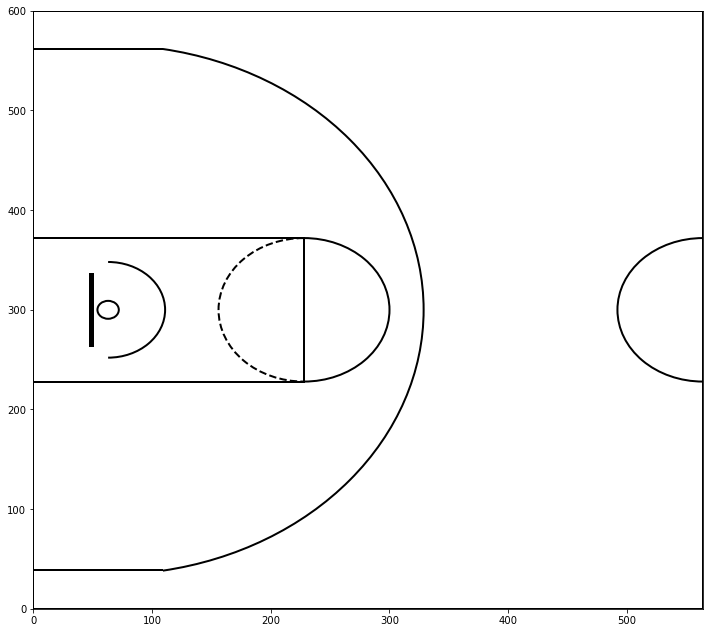

In [15]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(0,564)
plt.ylim(0,600)
plt.show()

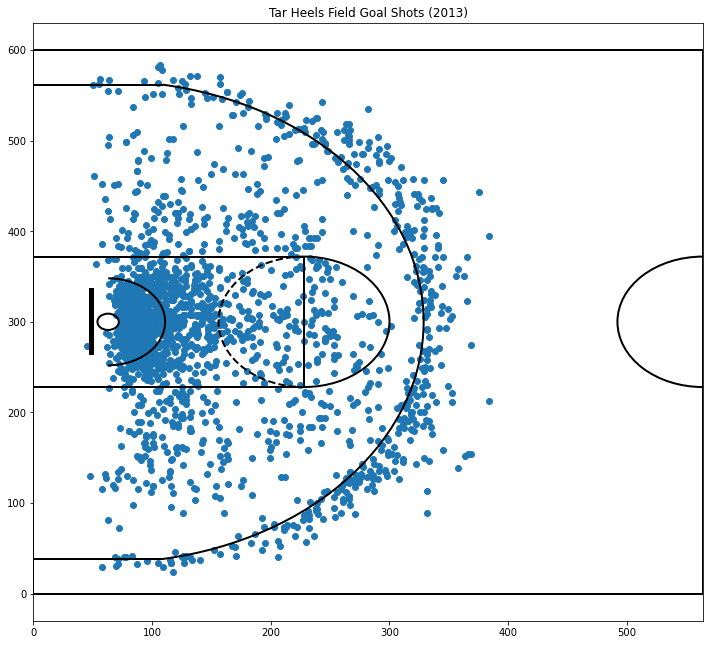

In [21]:
plt.figure(figsize=(12,11))
plt.scatter(duke_2013.event_coord_x,duke_2013.event_coord_y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(0,564)
plt.title("Tar Heels Field Goal Shots (2013)")
plt.show()

event_coord_x: The location of the play in number of inches from the "left" baseline, max 1128

event_coord_y: The location of the play in inches from the "top" sideline, max 600

In [55]:
shots.loc[shots['team_basket']== "right"]

,game_id,load_timestamp,season,away_name,away_id,away_alias,home_name,home_id,home_alias,period,...,event_coord_x,event_coord_y,event_type,type,shot_made,shot_type,shot_subtype,three_point_shot,points_scored,timeout_duration
0,08b245ae-e35e-45b1-8184-868bd54ec163,2018-03-07 03:00:00 UTC,2017,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,Retrievers,32755362-6336-4dd3-ac34-6f72a6cc150b,UMBC,2,...,796.0,147.0,threepointmiss,fieldgoal,False,jump shot,NaN,True,NaN,NaN
1,5d3e89b0-5f06-4746-be78-2ef34350b63f,2018-02-15 17:01:09.500656 UTC,2017,Eagles,4b3ff02c-e0ba-435b-a565-6075bc491684,BC,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,2,...,195.0,410.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
2,84707465-95e5-463e-bd75-71cbacd5830c,2018-02-01 12:12:40.589349 UTC,2016,Purple Eagles,f7575278-12ec-494a-b544-427c1759d43d,NIAG,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,2,...,894.0,310.0,freethrowmiss,freethrow,False,NaN,NaN,False,NaN,NaN
4,565498b3-afbd-456a-b79b-00fc235fbf12,2018-02-02 09:06:32.705048 UTC,2015,Bulls,a9f5c9a2-342c-4881-9996-5d5c05ec9bd9,BUFF,Bobcats,327f09e2-e75f-4014-8ef7-caf9202cd583,OHIO,1,...,236.0,311.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
5,edd0aa62-7d48-4114-bcbe-9564ab2bb89d,2018-02-01 14:33:34.057652 UTC,2015,Tigers,0c0608b3-f349-4f5e-9a10-7e6a744dd0d2,AUB,Crimson,5c7bf63f-bc39-43c5-9907-73b50b7a6b34,HARV,2,...,120.0,290.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119692,19ae3719-2fc1-4d1c-960f-86f87722b19e,2018-02-01 15:09:15.094064 UTC,2014,Panthers,2c93a75d-5449-4ec1-9ca2-1e6c812399a4,UNI,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,208.0,400.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
4119693,4284387d-4929-4762-813a-6b138163a2d3,2018-02-01 15:27:22.283444 UTC,2014,Braves,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,BRAD,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,1052.0,286.0,assist,twopointmade,False,NaN,NaN,False,NaN,NaN
4119694,a7f0642e-589d-42c1-a065-bf2216196525,2018-03-10 23:35:00 UTC,2017,Cougars,1f99a164-d593-4d81-85d5-0d7889d6f486,HOU,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,253.0,78.0,personalfoul,personalfoul,False,NaN,NaN,False,NaN,NaN
4119695,0ccb6184-7abc-4035-ad14-6b2c405ee002,2018-02-02 08:34:25.766707 UTC,2016,Braves,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,BRAD,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,2,...,948.0,296.0,twopointmiss,fieldgoal,False,jump shot,NaN,False,NaN,NaN


**Data Exploration**

In [74]:
threeAtt = box.groupby('season').agg({'three_points_att':'mean', 'three_points_pct':'mean'})
threeAtt

,three_points_att,three_points_pct
season,,
2013,18.045478,35.162791
2014,18.609407,35.125927
2015,20.579062,35.275248
2016,21.174422,35.847673
2017,21.990173,35.859993


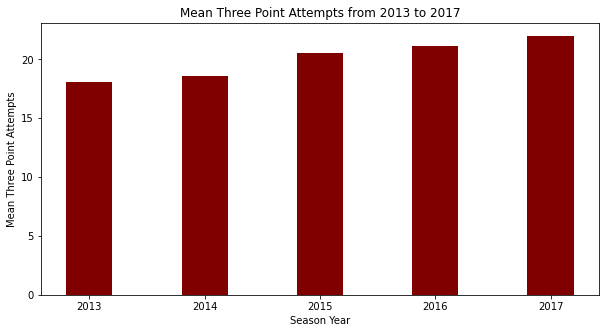

In [72]:
data = {'2013':18.05, '2014':18.61, '2015':20.58,
        '2016':21.17, '2017':21.99}
years = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years, values, color ='maroon',
        width = 0.4)
 
    
plt.xlabel("Season Year")
plt.ylabel("Mean Three Point Attempts")
plt.title("Mean Three Point Attempts from 2013 to 2017")
plt.show()

*Convert Dependent Variable to 0 and 1*

In [26]:
for index, value in box.iterrows():
    
    if box.loc[index,'win'] == True:
        box.loc[index,'win'] = 1
    else:
        box.loc[index,'win'] = 0


In [27]:
#box.to_csv("/Users/chejeong/Desktop/ncaa_boxscore_filtered2.csv")

### Three Point Shot Distance

We process data to investigate whether NCAA basketball players attempt three point shots at greater distances over time

In [218]:
distance = shots.copy()
shots.head()

,game_id,load_timestamp,season,away_name,away_id,away_alias,home_name,home_id,home_alias,period,...,event_coord_x,event_coord_y,event_type,type,shot_made,shot_type,shot_subtype,three_point_shot,points_scored,timeout_duration
0,08b245ae-e35e-45b1-8184-868bd54ec163,2018-03-07 03:00:00 UTC,2017,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,Retrievers,32755362-6336-4dd3-ac34-6f72a6cc150b,UMBC,2,...,796.0,147.0,threepointmiss,fieldgoal,False,jump shot,NaN,True,NaN,NaN
3,8497a85b-3939-4c1c-b27e-e7ac9b814b09,2018-02-01 14:42:51.540252 UTC,2015,Sycamores,2a997096-a381-469d-a7e9-9e031c8b071c,INST,Braves,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,BRAD,1,...,328.0,291.0,threepointmade,fieldgoal,True,jump shot,NaN,True,3.0,NaN
7,020b1e81-e3ec-4763-a058-b1bac1a2c491,2018-02-02 09:03:56.370161 UTC,2014,Pioneers,3556d445-b3f1-467e-b150-952b32dfb150,SHU,Bulldogs,61dadefa-76bf-4db4-8067-f88df540b9cd,BRY,1,...,257.0,81.0,threepointmiss,fieldgoal,False,jump shot,NaN,True,NaN,NaN
9,0a01e55e-5cce-460b-a43a-9d777a13d9b0,2018-02-15 16:54:17.083833 UTC,2017,Rams,1a470730-f328-4fb1-8bbf-36a069e4d6b2,CSU,Broncos,c1c54dbf-805c-47fc-a707-c803e94db2a4,BSU,1,...,87.0,305.0,twopointmade,fieldgoal,True,layup,NaN,False,2.0,NaN
14,9b7b89f9-d4cc-4db3-82d1-d493b80a9bac,2018-03-08 22:05:00 UTC,2017,Golden Flashes,3da4798c-2d58-4dac-b66e-ad145a91b544,KENT,Cardinals,315c4deb-3c9d-413d-a369-7168f2545d21,BALL,1,...,103.0,219.0,twopointmiss,fieldgoal,False,layup,NaN,False,NaN,NaN


In [220]:
# (63,300) hoop
distance.columns


(1259062, 31)
(441106, 31)


We convert full court shot position to half court equivalent below

In [221]:
distance = distance.loc[distance['type'] == 'fieldgoal']
distance = distance[distance['team_basket'].notna()]

#filter three point shot
distance = distance.loc[distance['three_point_shot'] == True]

for index, row in distance.iterrows():
    
    if distance.loc[index,'team_basket'] == "right":
        distance.loc[index,'team_basket'] = "left"
        distance.loc[index,'event_coord_x'] = 1128 - distance.loc[index,'event_coord_x']
        distance.loc[index,'event_coord_y'] = 600 - distance.loc[index,'event_coord_y']

distance = distance[distance['event_coord_x'] < 564]

In [223]:
distance = distance[['season','timestamp','event_coord_x', 'event_coord_y', 'shot_made']]

We generate `distanceToBasket` variable that calculates distance to the basket based on shot coordinate

In [234]:
distance['distanceToBasket'] = (((distance['event_coord_x']-63)**2) + ((distance['event_coord_y']-300))**2)
distance['distanceToBasket'] = distance.apply(lambda row : math.sqrt(row['distanceToBasket']), axis = 1)

,season,timestamp,event_coord_x,event_coord_y,shot_made,distanceToBasket
0,2017,2018-03-07 02:09:00 UTC,332.0,453.0,False,309.467284
3,2015,2016-02-07 01:40:36 UTC,328.0,291.0,True,265.152786
7,2014,2015-03-05 00:06:47 UTC,257.0,81.0,False,292.569650
17,2016,2017-03-30 00:38:10 UTC,282.0,88.0,False,304.803215
20,2017,2018-03-09 00:01:00 UTC,351.0,290.0,False,288.173559
...,...,...,...,...,...,...
4119588,2017,2017-11-11 02:26:29 UTC,70.0,20.0,False,280.087486
4119590,2014,2014-12-17 02:09:30 UTC,136.0,35.0,False,274.870879
4119633,2017,2018-02-16 00:39:36 UTC,291.0,160.0,True,267.551864
4119638,2014,2015-01-08 01:11:38 UTC,267.0,132.0,False,264.272587


We convert `timestamp` to a variable with format `yyyy-mm` below

In [237]:
dates = distance.timestamp
dates = [date[0:7] for date in dates]
distance['date'] = dates

We observe number of shots in each month by year below

In [238]:
import collections
counter = collections.Counter(dates)
counter

Counter({'2018-03': 18142,
         '2016-02': 19591,
         '2015-03': 17040,
         '2017-03': 20855,
         '2015-02': 16604,
         '2018-02': 20435,
         '2016-01': 21829,
         '2017-02': 19410,
         '2017-12': 21205,
         '2017-01': 18710,
         '2016-12': 17812,
         '2016-03': 20648,
         '2014-12': 18498,
         '2018-01': 19711,
         '2013-11': 13958,
         '2015-01': 18189,
         '2013-12': 13379,
         '2015-12': 23073,
         '2014-01': 12322,
         '2015-11': 18630,
         '2014-11': 15466,
         '2014-03': 10136,
         '2017-11': 17033,
         '2016-11': 14182,
         '2015-04': 313,
         '2014-02': 12054,
         '2014-04': 462,
         '2017-04': 194,
         '2016-04': 170,
         '2014-05': 162,
         '2015-05': 5,
         '2018-04': 114,
         '2017-10': 4})

**Data Filter**

1. We observe that most games take place during November, December, January, February, and March. April, May, and October are rare. Therefore, we filter those dates out.
2. Corner threes are bounded by the sideline, so it is not possible to shoot at greater distances. So we filter out corner threes. Thus, x-coordinate should be greater than 119.


In [242]:
distance = distance.loc[distance['event_coord_x'] >= 119]
distance = distance.loc[distance['date'] != '2015-04']
distance = distance.loc[distance['date'] != '2014-04']
distance = distance.loc[distance['date'] != '2017-04']
distance = distance.loc[distance['date'] != '2016-04']
distance = distance.loc[distance['date'] != '2018-04']
distance = distance.loc[distance['date'] != '2014-05']
distance = distance.loc[distance['date'] != '2015-05']
distance = distance.loc[distance['date'] != '2017-10']
distance

,season,timestamp,event_coord_x,event_coord_y,shot_made,distanceToBasket,date
0,2017,2018-03-07 02:09:00 UTC,332.0,453.0,False,309.467284,2018-03
3,2015,2016-02-07 01:40:36 UTC,328.0,291.0,True,265.152786,2016-02
7,2014,2015-03-05 00:06:47 UTC,257.0,81.0,False,292.569650,2015-03
17,2016,2017-03-30 00:38:10 UTC,282.0,88.0,False,304.803215,2017-03
20,2017,2018-03-09 00:01:00 UTC,351.0,290.0,False,288.173559,2018-03
...,...,...,...,...,...,...,...
4119571,2017,2017-12-16 23:11:21 UTC,230.0,505.0,True,264.412556,2017-12
4119590,2014,2014-12-17 02:09:30 UTC,136.0,35.0,False,274.870879,2014-12
4119633,2017,2018-02-16 00:39:36 UTC,291.0,160.0,True,267.551864,2018-02
4119638,2014,2015-01-08 01:11:38 UTC,267.0,132.0,False,264.272587,2015-01


In [245]:
distanceAgg = distance.groupby('date').agg({'distanceToBasket':'mean'})
distanceAgg = distanceAgg.reset_index()

In [247]:
distanceAgg.to_csv("/Users/chejeong/Desktop/threepointshotdistance.csv")

,date,distanceToBasket
0,2013-11,279.799193
1,2013-12,277.981830
2,2014-01,278.287449
3,2014-02,277.655762
4,2014-03,277.651128
5,2014-11,283.247018
6,2014-12,284.295879
7,2015-01,285.149029
8,2015-02,283.778770
9,2015-03,286.426431


In [249]:
shots.columns

Index(['game_id', 'load_timestamp', 'season', 'away_name', 'away_id',
       'away_alias', 'home_name', 'home_id', 'home_alias', 'period',
       'game_clock', 'elapsed_time_sec', 'team_name', 'team_id', 'team_alias',
       'team_basket', 'possession_team_id', 'player_id', 'player_full_name',
       'event_id', 'timestamp', 'event_coord_x', 'event_coord_y', 'event_type',
       'type', 'shot_made', 'shot_type', 'shot_subtype', 'three_point_shot',
       'points_scored', 'timeout_duration'],
      dtype='object')

In [252]:
shots.three_point_shot

0           True
3           True
7           True
9          False
14         False
           ...  
4119672     True
4119686    False
4119688    False
4119695    False
4119697    False
Name: three_point_shot, Length: 1259062, dtype: bool